# Case Study 4 - Digit dataset

# 2021F-T1 AISC1003 - Machine Learning 1 01 (M07 Group 1)

# Prof. Jagmohan Dutta

# Name : Pratik Domadiya

# Student Id : 500199494

# Task : To build at-least two models to identify hand written digits and recommend the best one to be deployed.

In [247]:
#load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [248]:
#load the dataset
data=load_digits()

In [249]:
print(type(data))
print(data.data.shape)# shape of the dataset

<class 'sklearn.utils.Bunch'>
(1797, 64)


In [250]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [251]:
print(data.target)
print(data.target.shape)# shape of the target data

[0 1 2 ... 8 9 8]
(1797,)


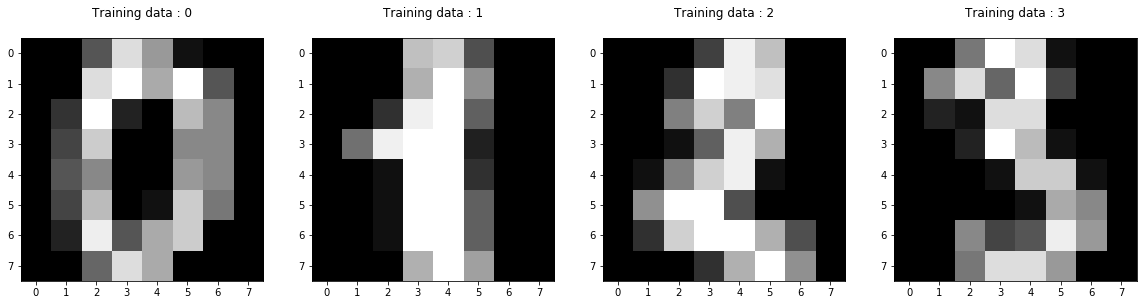

In [252]:
# display the sample data
plt.figure(figsize=(20,5))
for i, (img, label)  in enumerate (zip(data.data[0:4],data.target[0:4])):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(img, (8,8)),cmap=plt.cm.gray)
    plt.title('Training data : %i\n' % label)

## Hand writing digits classification with LogisticRegression

In [253]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.20, random_state=0)

In [254]:
from sklearn.linear_model import LogisticRegression
def lr_model(solver):
    model_lr=LogisticRegression(solver=solver,multi_class='multinomial',max_iter=50000)
    model_lr.fit(x_train,y_train)
    pred_all = model.predict(x_test)
    print(" LogisticRegression model accuracy with "+solver+" solver: ",model_lr.score(x_test,y_test)*100,"%")


Here 'multi_class' parameter have two options.
1. multi_class='ovr' : ovr means one-vs-rest. for ex. if model have n target classes then it will find a score for each 
class by comparing each class with other classes(kind of binary classification) and predict the class with the highest value.
It is useful when we have smaller numbers of target classes are available with the least overlapping between all the classes.
Here in handwriting recognition there are some overlapping digits may present. for ex. 7 and 1 looks like similar shape, 3 & 8 
is the another case. So i haven't used ovr here but i am using a multinomial option here.

2. multi_class='multinomial' : if model have n target classes then it will find a score/probability score for each 
classes and with the highest score, model will predict that class as an output. It is useful when we have large number of known 
classes. In our case we knew that dataset have only 10 different target classes so it will perform well and that's why i have used 
multinomial logistic regression here.
    
    

In [255]:
'''
'Solver' parameter is used for find out local/global minima for reaching at optimal solution. These are the algorithms used for 
to find out optimal solution and converge the model. There are total 5 different solver('newton-cg', 'lbfgs', 'sag', 'saga'
,'liblinear') are present but liblinear is used for only binary classification problem so I have used another four only and find out
what is accuracy of the logistic model by using each one of them.

'''
solvers=['newton-cg', 'lbfgs', 'sag', 'saga'] #solver names
for solver in solvers:
    lr_model(solver)


 LogisticRegression model accuracy with newton-cg solver:  95.83333333333334 %
 LogisticRegression model accuracy with lbfgs solver:  95.83333333333334 %
 LogisticRegression model accuracy with sag solver:  96.11111111111111 %
 LogisticRegression model accuracy with saga solver:  96.38888888888889 %


'Here I got the maximum accuracy with saga solver with 96.38% so i am using that for training the data.'


In [256]:
# train model with sag solver 
model_lr=LogisticRegression(solver='saga',multi_class='multinomial',max_iter=50000)
model_lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

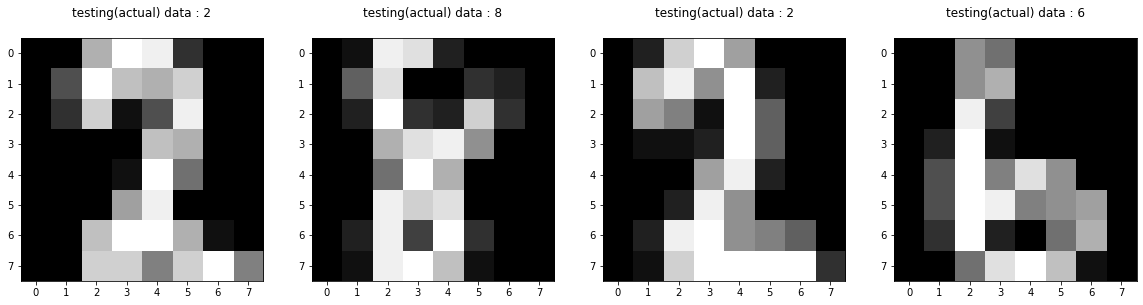

In [257]:
# display the sample of actual  data
plt.figure(figsize=(20,5))
for i, (img, label)  in enumerate (zip(x_test[0:4],y_test[0:4])):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(img, (8,8)),cmap=plt.cm.gray)
    plt.title('testing(actual) data : %i\n' % label)

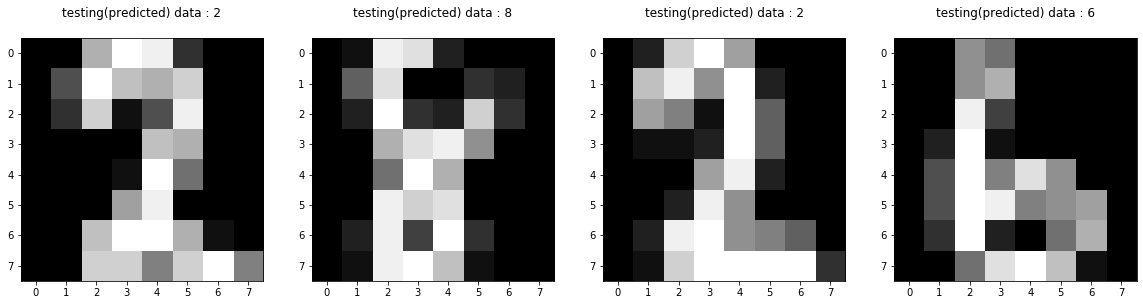

In [258]:
pred=model_lr.predict(x_test[0:4])# predict a few data with trained model
# display the sample of predicted data
plt.figure(figsize=(20,5))
for i, (img, label)  in enumerate (zip(x_test[0:4],pred[0:4])):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(img, (8,8)),cmap=plt.cm.gray)
    plt.title('testing(predicted) data : %i\n' % label)

In [259]:
pred_lr_all = model_lr.predict(x_test)# make a prediction of the data

In [260]:
print("Accuracy : ",model_lr.score(x_test,y_test)*100,"%")

Accuracy :  96.66666666666667 %


In [261]:
from sklearn import metrics
confusion_metrics=metrics.confusion_matrix(y_test,pred_all)# create a confusion metrics
print(confusion_metrics)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  3  0]
 [ 0  0 34  2  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0  0  1  0  0 37  0  0]
 [ 0  2  1  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  2 37]]


Text(0.5, 1, 'Accuracy Score: 0.9666666666666667')

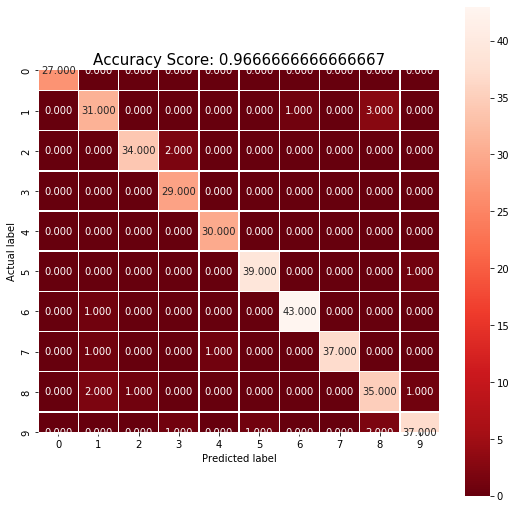

In [262]:
# display confusion metrics
plt.figure(figsize=(9,9))
sns.heatmap(confusion_metrics, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model_lr.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [263]:
# display other metrics 
print(" F1 Score : ",metrics.f1_score(y_test,pred_lr_all,average='weighted'))
print(" Recall : ",metrics.recall_score(y_test,pred_lr_all,average='weighted'))
print(" Precision : ",metrics.precision_score(y_test,pred_lr_all,average='weighted'))
print()
print('**************************  Classification Report ******************************')
print(metrics.classification_report(y_test,pred_lr_all))

 F1 Score :  0.966705385678721
 Recall :  0.9666666666666667
 Precision :  0.9671569624185903

**************************  Classification Report ******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.94      0.93        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      0.97      0.97        30
           5       0.97      0.95      0.96        40
           6       1.00      0.98      0.99        44
           7       0.97      0.97      0.97        39
           8       0.97      0.92      0.95        39
           9       0.93      0.98      0.95        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# Hand writing digits recognition with SVM

In [264]:
# svm 
from sklearn import svm
# modelling the data
def svc_model(kernel):
    model_svc = svm.SVC(gamma=0.001,C=1.0,kernel=kernel)
    model_svc.fit(x_train,y_train)
    pred_svc_all=model_svc.predict(x_test)
    print(" SVC model accuracy with "+kernel+" kernel: ",model_svc.score(x_test,y_test)*100,"%")

In [265]:
'''
kernels deals with non-linearity and higher dimensions

1. Linear kernels
The most basic way to use a SVC is with a linear kernel, which means the decision boundary is a straight line (or hyperplane in higher dimensions).
Linear kernels are rarely used in practice.

2. RBF- radial basis functional
It is a general-purpose kernel; used when there is no prior knowledge about the data and working well with linear and 
non-linear data. 

3. poly 
It is popular in image processing. Here our dataset is images so it is performing well.

4. sigmoid
mostly prefered for neural network.

ref : https://data-flair.training/blogs/svm-kernel-functions/
'''
kernels=['rbf','poly','sigmoid','linear']# list of availbale kernel options
for kernel in kernels:
    svc_model(kernel)#test all the kernels on model one by one

 SVC model accuracy with rbf kernel:  99.16666666666667 %
 SVC model accuracy with poly kernel:  98.61111111111111 %
 SVC model accuracy with sigmoid kernel:  69.44444444444444 %
 SVC model accuracy with linear kernel:  97.77777777777777 %


So in our case rbf kernel gives the maximum score for accuracy with 99.16%. So we are going to use that kernel to recognize the 
handwriting digits.

In [266]:
# train the model with rbf kernel
model_svc = svm.SVC(gamma=0.001,C=1.0,kernel='rbf')
model_svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

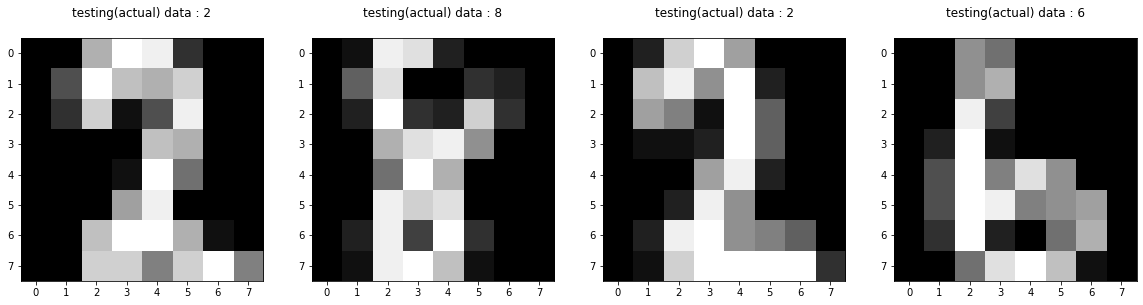

In [267]:
# display the sample of actual data
plt.figure(figsize=(20,5))
for i, (img, label)  in enumerate (zip(x_test[0:4],y_test[0:4])):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(img, (8,8)),cmap=plt.cm.gray)
    plt.title('testing(actual) data : %i\n' % label)

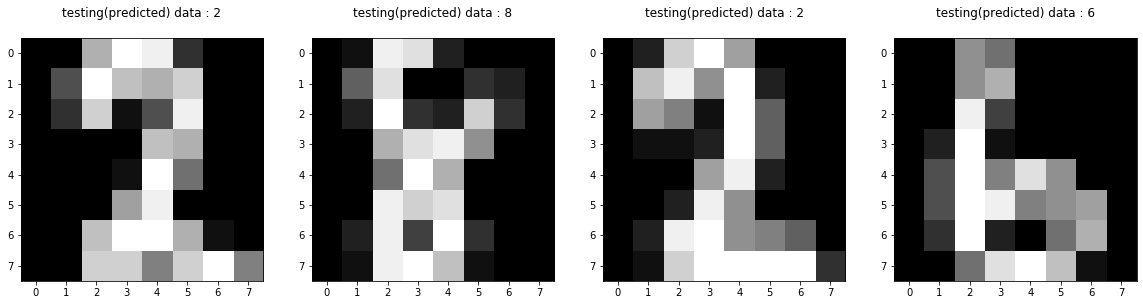

In [268]:
pred_svc=model_lr.predict(x_test[0:4])# predict the data with trained model
# display the sample of predicted data
plt.figure(figsize=(20,5))
for i, (img, label)  in enumerate (zip(x_test[0:4],pred_svc[0:4])):
    plt.subplot(1,4,i+1)
    plt.imshow(np.reshape(img, (8,8)),cmap=plt.cm.gray)
    plt.title('testing(predicted) data : %i\n' % label)

In [269]:
pred_svc_all=model_svc.predict(x_test)# make prediction on test data
# display model accuracy
print(" SVC model accuracy : ",model_svc.score(x_test,y_test)*100,"%")

 SVC model accuracy :  99.16666666666667 %


In [270]:
# display confusion metrix
confusion_metrics_svc=metrics.confusion_matrix(y_test,pred_svc_all)
print(confusion_metrics_svc)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


In [271]:
# display other metrics
print(" F1 Score : ",metrics.f1_score(y_test,pred_svc_all,average='weighted'))
print(" Recall : ",metrics.recall_score(y_test,pred_svc_all,average='weighted'))
print(" Precision : ",metrics.precision_score(y_test,pred_svc_all,average='weighted'))
print()
print('**************************  Classification Report ******************************')
print(metrics.classification_report(y_test,pred_svc_all))

 F1 Score :  0.9916681909639657
 Recall :  0.9916666666666667
 Precision :  0.9917438271604938

**************************  Classification Report ******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        39
           8       1.00      0.97      0.99        39
           9       0.98      0.98      0.98        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# References :
    
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

https://data-flair.training/blogs/svm-kernel-functions/

https://chrisalbon.com/code/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
https://medium.com/analytics-vidhya/handwritten-digit-recognition-using-logistic-regression-8d3b3f7e31c0
https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200